In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.metrics import classification_report

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


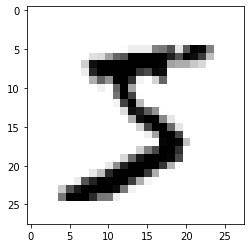

In [3]:
single_img=x_train[0]
plt.imshow(single_img,cmap='gray_r')

In [4]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [5]:
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [9]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1420 - accuracy: 0.9573
Epoch 2/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0503 - accuracy: 0.9850


In [14]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.9856


[0.04234251379966736, 0.9855999946594238]

In [17]:
model.save('mnist.h5')